# GRIP - The Sparks Foundation 

# Data Science and Business Analytics

# Name - Nalini Meenakshi

# Task 1: Prediction using Supervised ML

<br>

## Importing libraries 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Reading the dataset

In [2]:
data = pd.read_csv('Hours_and_Scores.csv')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Exploration

In [3]:
data.shape

(25, 2)

**Inference:** From the above result, we can see that the dataset has 25 rows and 2 columns present in it.

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Inference:** From the above result, we can see that the dataset has no null/missing values present in it.

In [5]:
data.duplicated().sum()

0

**Inference:** From the above result, we can see that, there are no duplicated values present in the dataset.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Inference:** <br>
- The above tabular column contains the information such as count, mean, standarad deviation, 25% value, 50% value, 75% value, minimum and maximum value of each variables present in the dataset. 
- Hence, from the above table, we can infer that, the count of each variable is 25 that is it has records on all its rows and indicated that there are no null/missing values present in the dataset.

## Check for Linearity

C:\Users\NALINI MEENAKSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hours Vs Percentage')

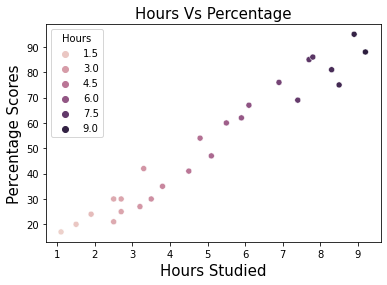

In [7]:
sns.scatterplot(data['Hours'], data['Scores'], hue = data['Hours'])
plt.xlabel('Hours Studied',fontsize = 15)
plt.ylabel('Percentage Scores',fontsize = 15)
plt.title('Hours Vs Percentage',fontsize = 15)

**Inference:** From the above plot, we can infer that, the data has a positive linear relation between the number of hours and percentage of score.

## Heatmap for Correlation

<AxesSubplot:>

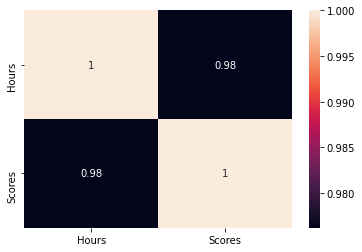

In [8]:
sns.heatmap(data.corr(),annot = True)

**Inference:** From the above heatmap, we can see that correlation = 0.98. This means that our dependent variable Scores increases as the independent variable Hours increases.

## Preparing the data using Train Test Split

In [9]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [11]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (20, 1)
Shape of X_test: (5, 1)
Shape of Y_train: (20,)
Shape of Y_test: (5,)


## Training the algorithm

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("Training Complete")

Training Complete


**From the above result, we can see that, the training of the algorithm is successfull.**

In [13]:
### Checking the coefficients for the prediction of each of the predictor

print('\n'+"Coefficient of the predictor :",regressor.coef_)

### Checking the intercept

print("Intercept                    :",regressor.intercept_)


Coefficient of the predictor : [9.91065648]
Intercept                    : 2.018160041434683


## Prediction of Training and Test data

In [14]:
y_pred= regressor.predict(X_test)  
x_pred= regressor.predict(X_train)

In [15]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
x_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

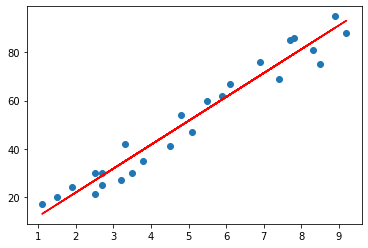

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color = 'red');
plt.show()

### Visualizing for train data result

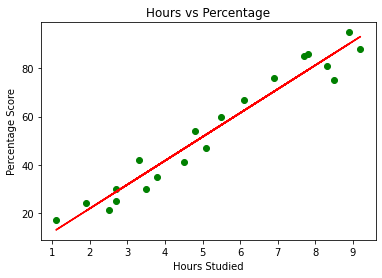

In [18]:
plt.scatter(X_train, Y_train, color="green")   
plt.plot(X_train, x_pred, color="red")    
plt.title("Hours vs Percentage")  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")  
plt.show()   

### Visualization of test data result

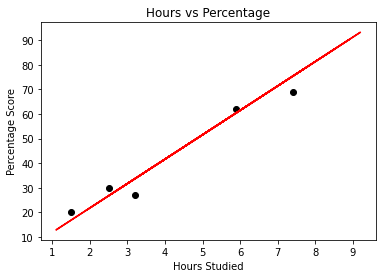

In [19]:
plt.scatter(X_test, Y_test, color="black")   
plt.plot(X_train, x_pred, color="red")    
plt.title("Hours vs Percentage")  
plt.xlabel("Hours Studied")  
plt.ylabel("Percentage Score")  
plt.show()   

## Making Predictions

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# Test with own data

hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


**Inference: From the above result, we can infer that, the predicted score of a student who studies for 9.25 hours/day is 93.69**

## Evaluation of the model

In [23]:
### Checking for MAE value 

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print("\nMean Absolute Error (MAE)      :",round(mae,2))
print("Mean Squared Error (MSE)       :",round(mse,2))
print("Root Mean Squared Error (RMSE) :",round(rmse,2))


Mean Absolute Error (MAE)      : 4.18
Mean Squared Error (MSE)       : 21.6
Root Mean Squared Error (RMSE) : 4.65


**Inference:** From the above result, we can infer that, all the error values are almost low.